In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm , skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
# # Mounting the google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

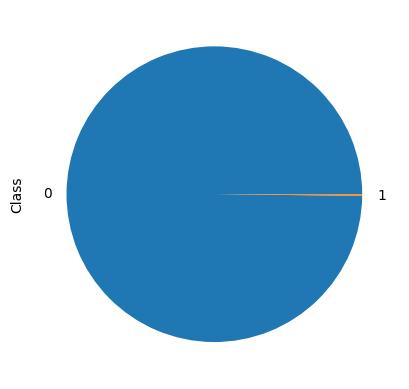

In [10]:
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [11]:
#checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


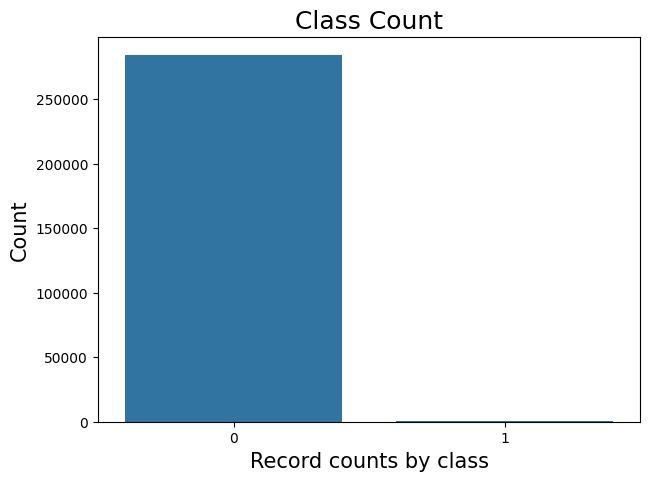

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x ='Class', data = df)
plt.title('Class Count', fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [13]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


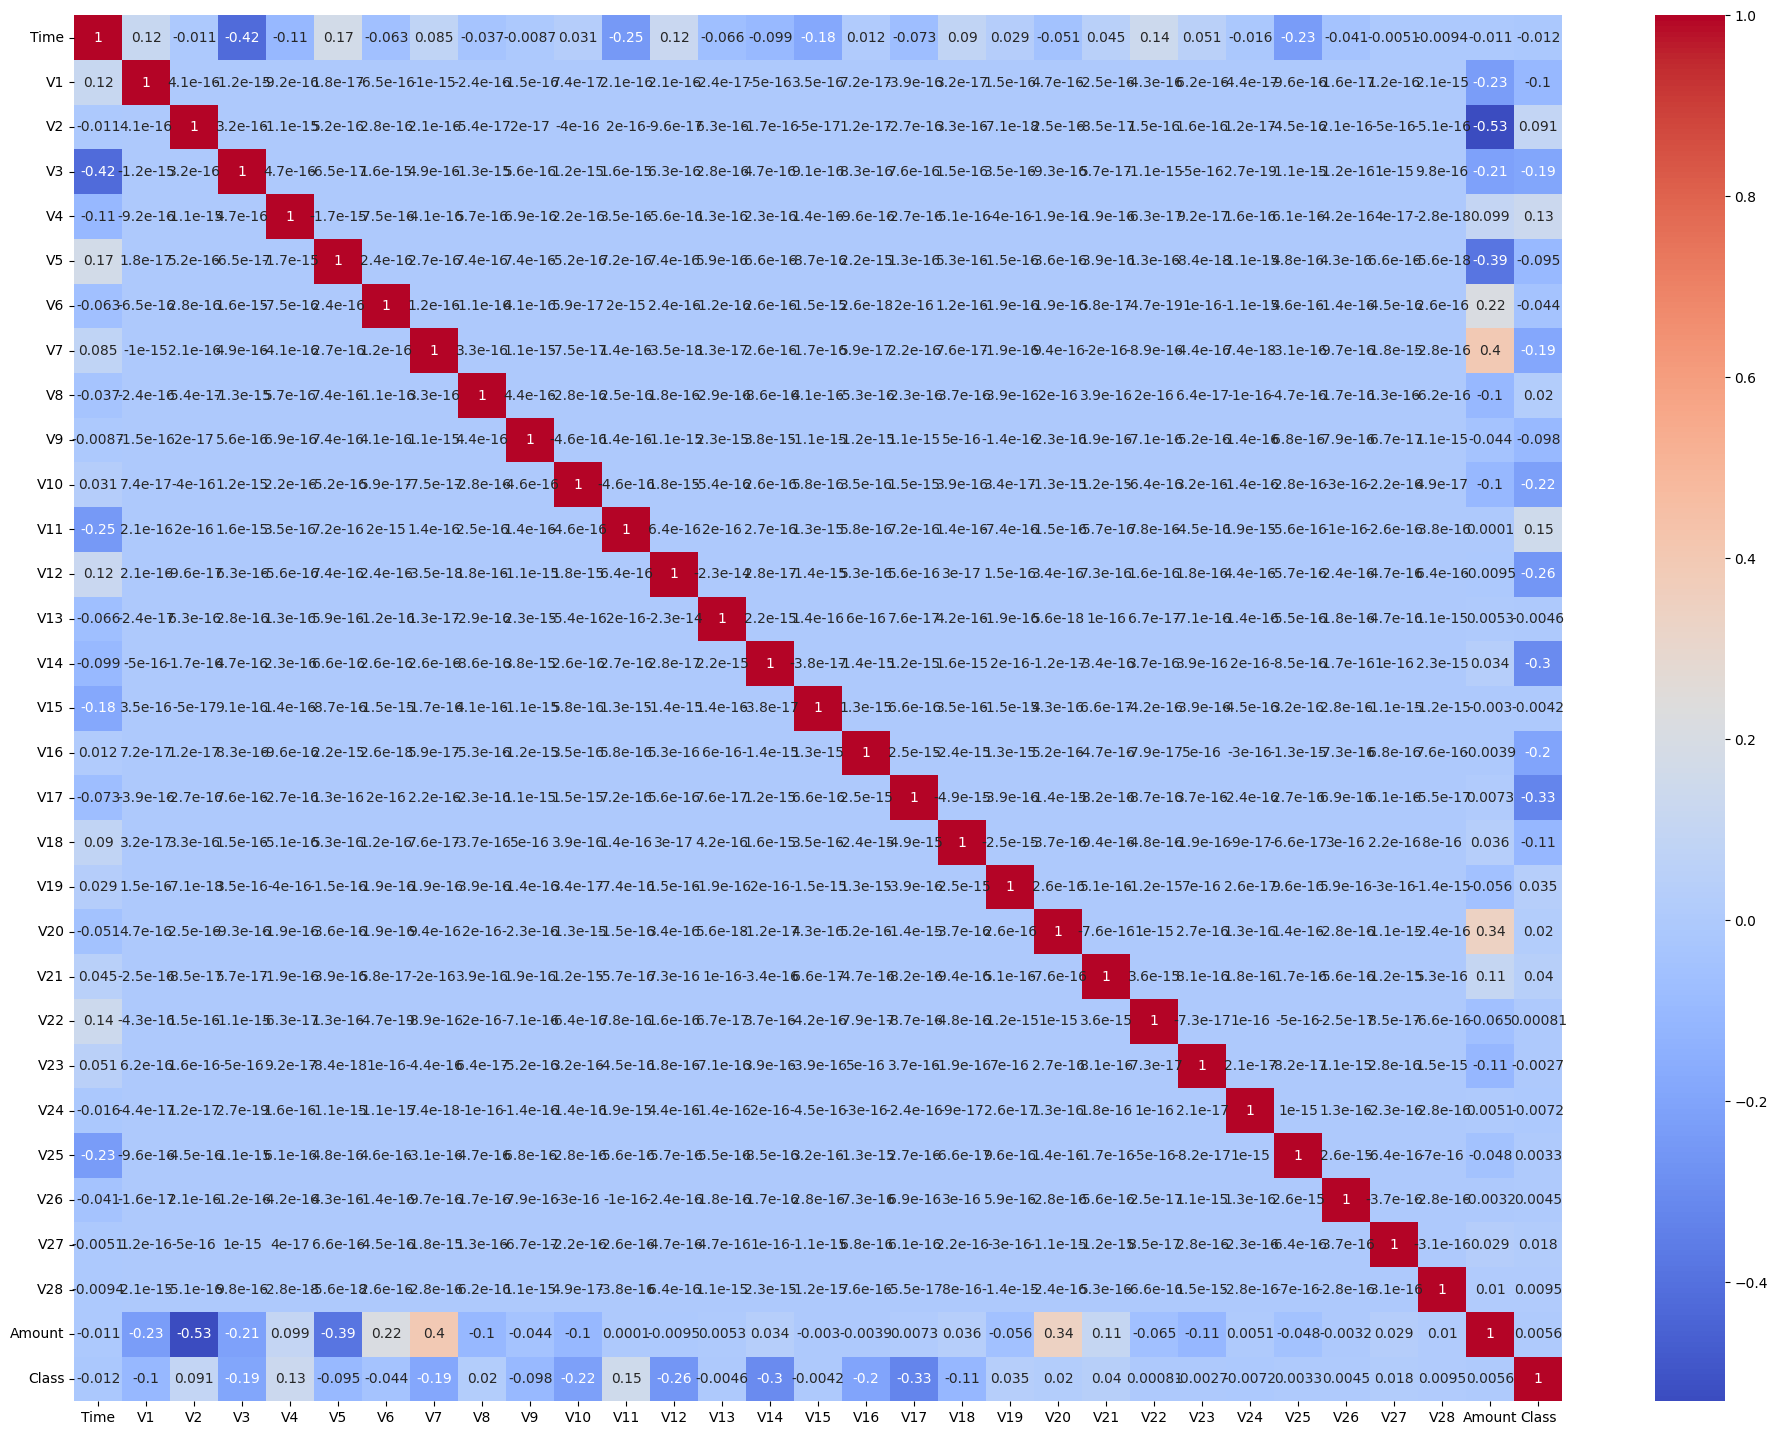

In [14]:
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [15]:
# As time given in relative fashion, we are using pandas, timedelta which Represents a duration, the difference betweem two time frames
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#create derived columns mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [16]:
#Drop unneccessary columns
#we will drop Time, as we have derived the Day/Hour/Minutes from the time colum
df.drop('Time', axis = 1, inplace=True)
#we will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace=True)

## Splitting the data into train and test data

In [17]:
y = df['Class']
X = df.drop(['Class'], axis=1)

In [18]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.20)

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


Ploting Distribution of the variables

In [21]:
cols = list(X.columns.values)

In [22]:
normal_records = df.Class == 0
fraud_records = df.Class == 1

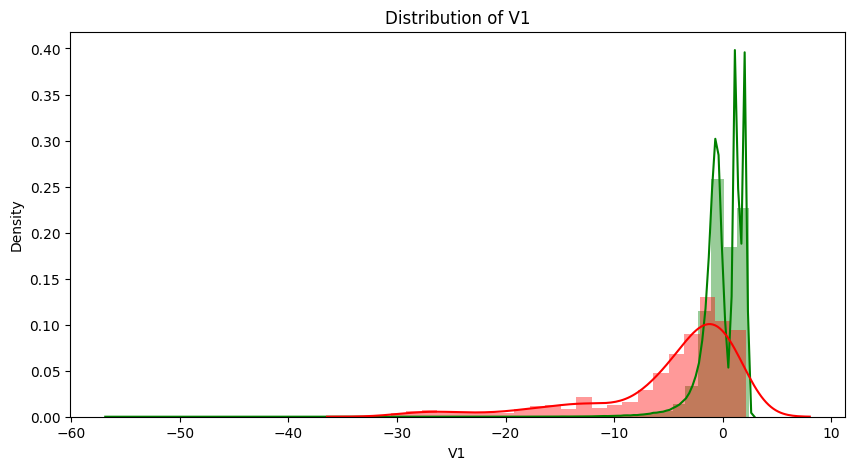

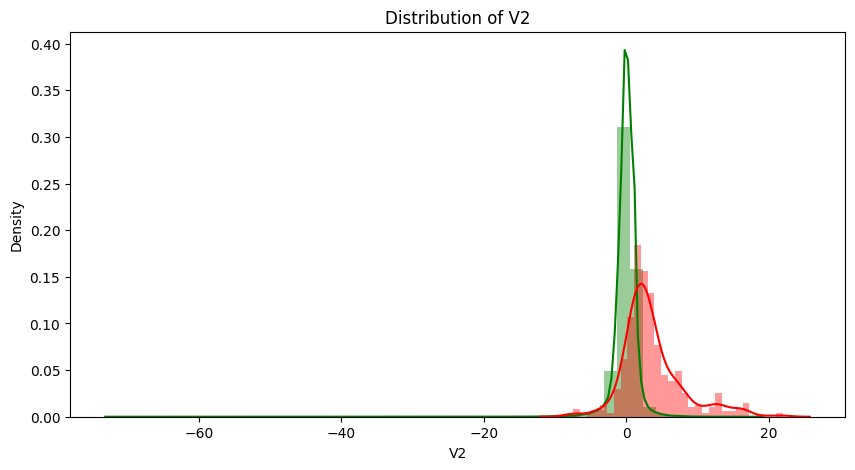

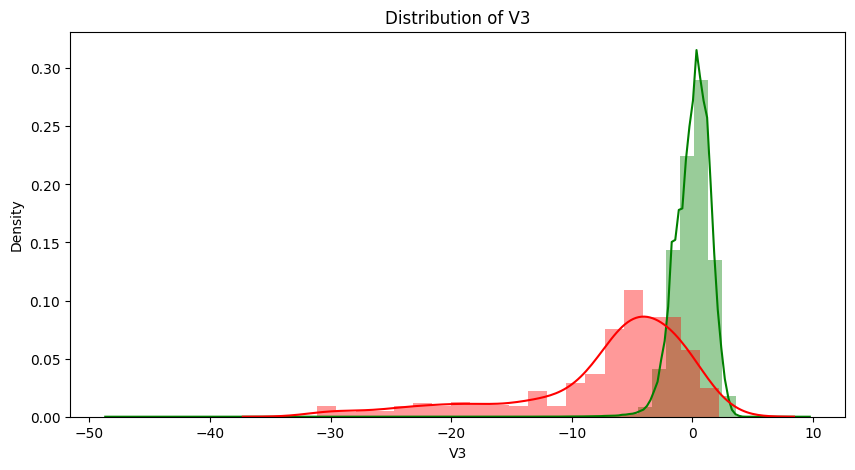

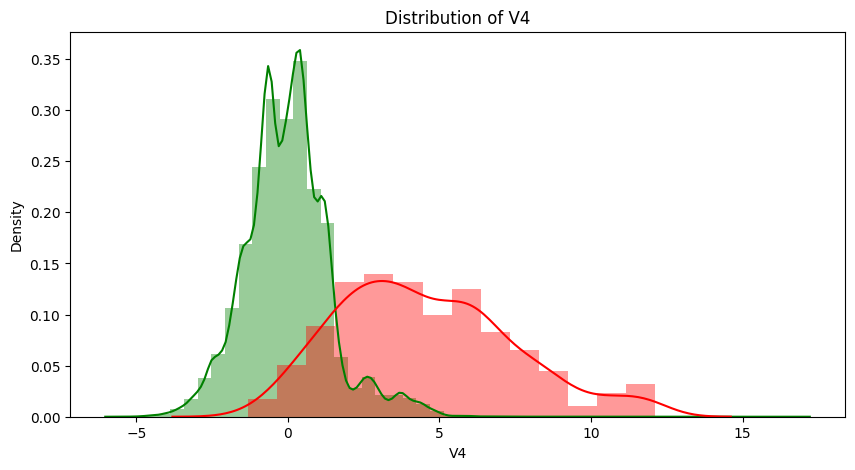

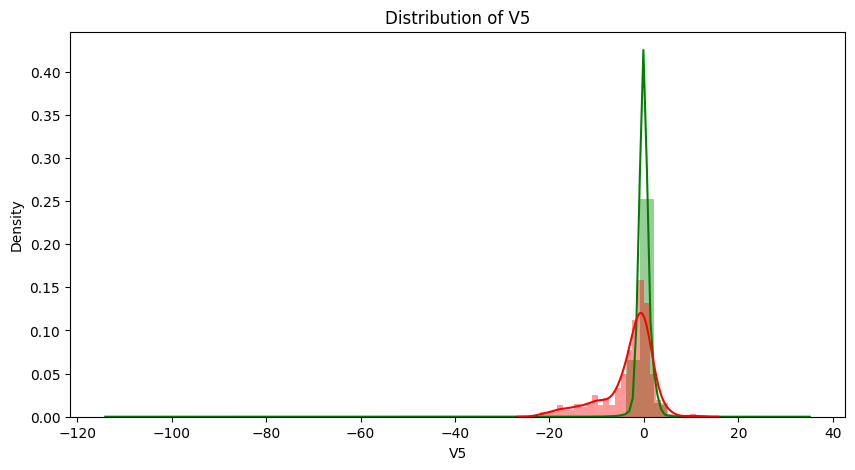

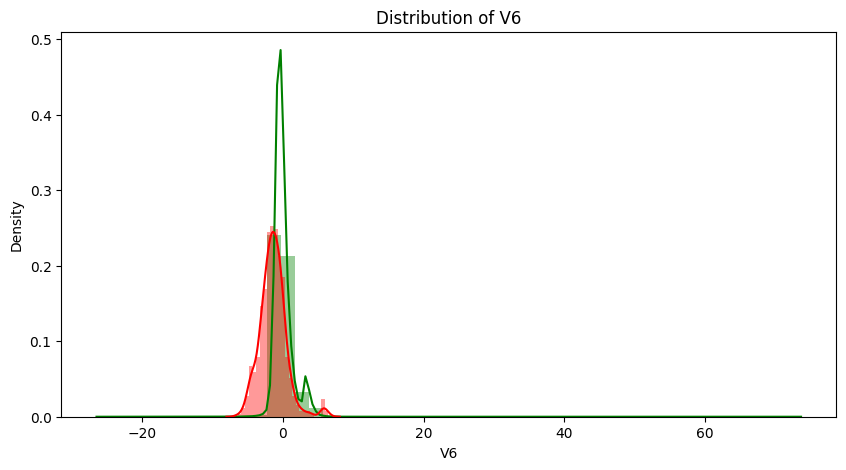

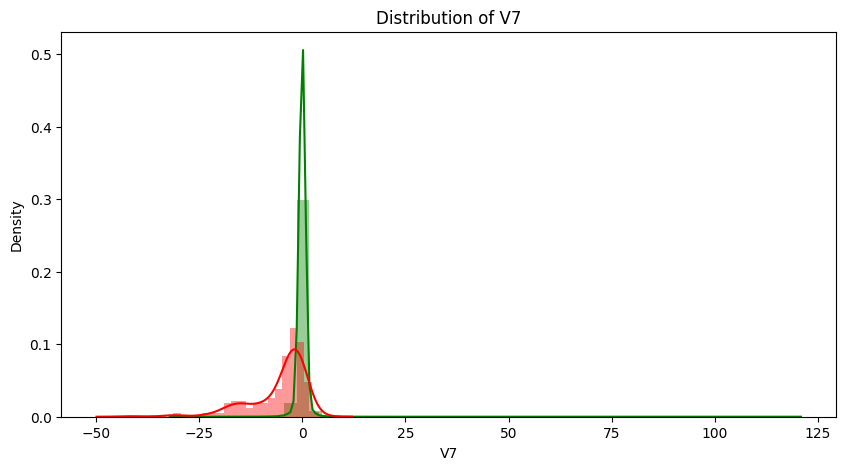

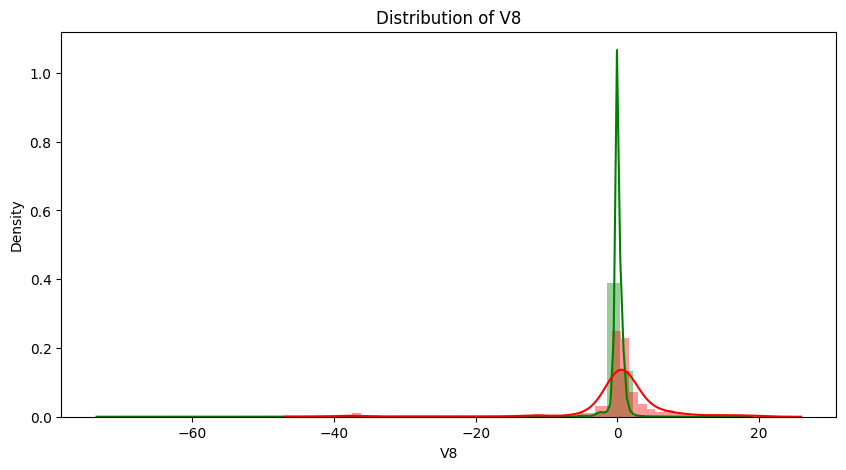

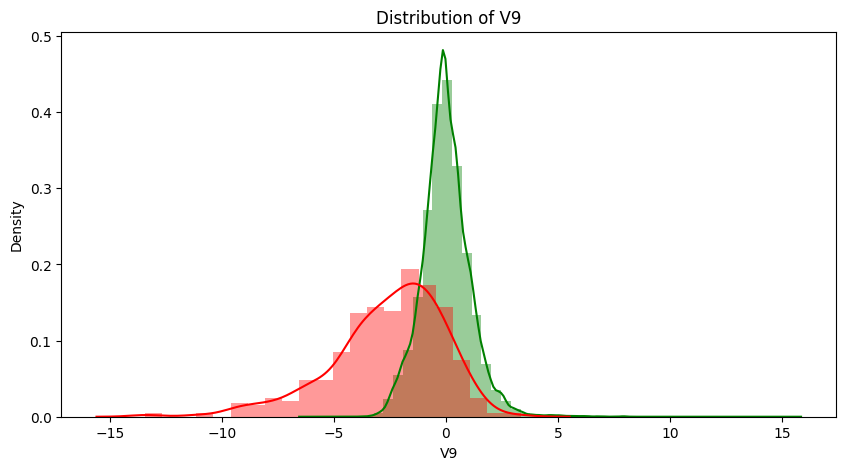

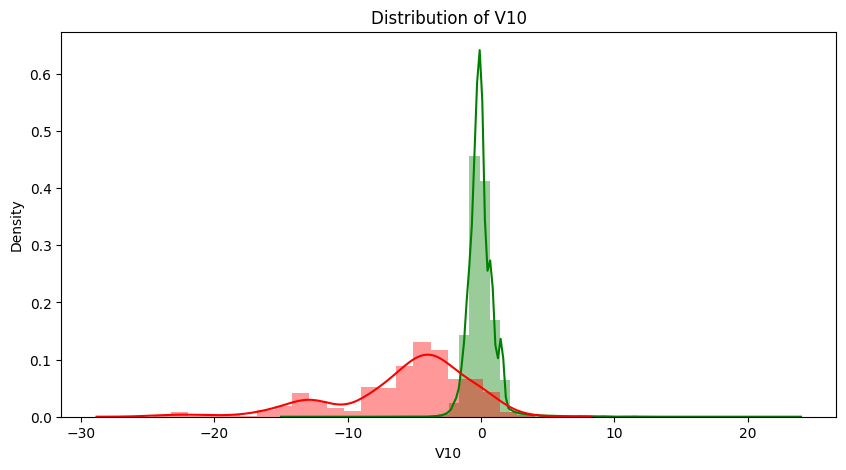

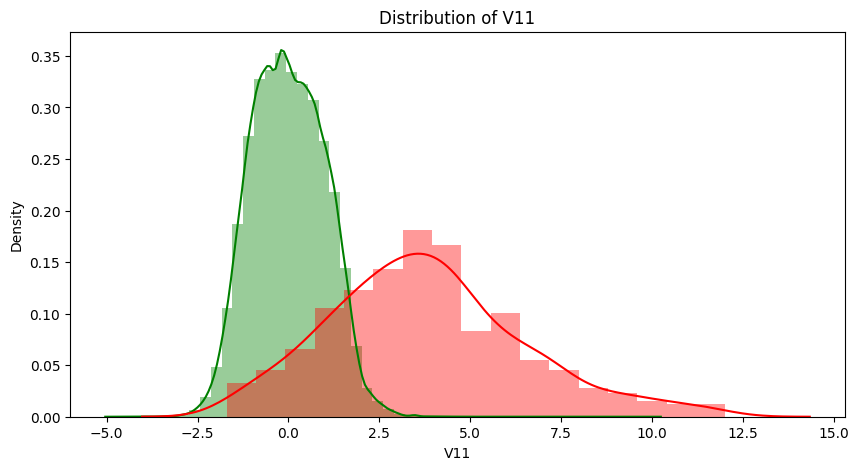

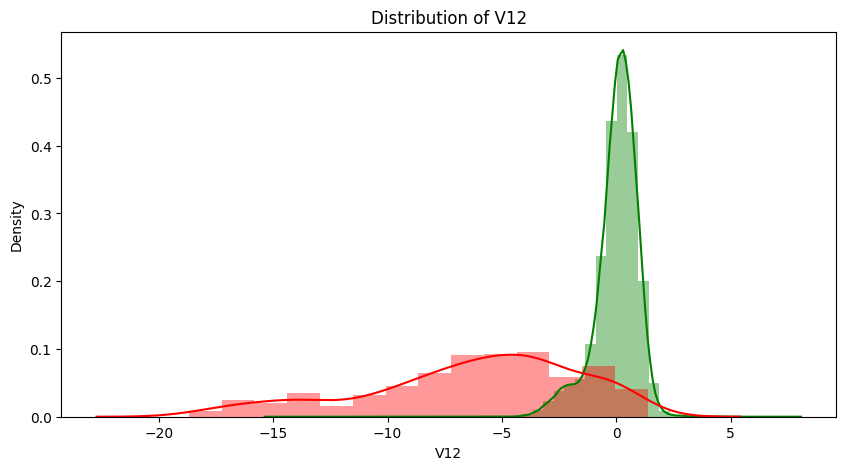

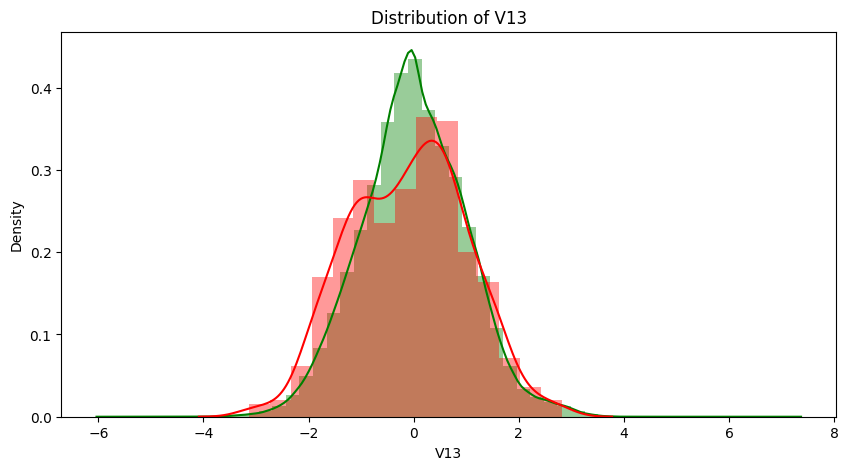

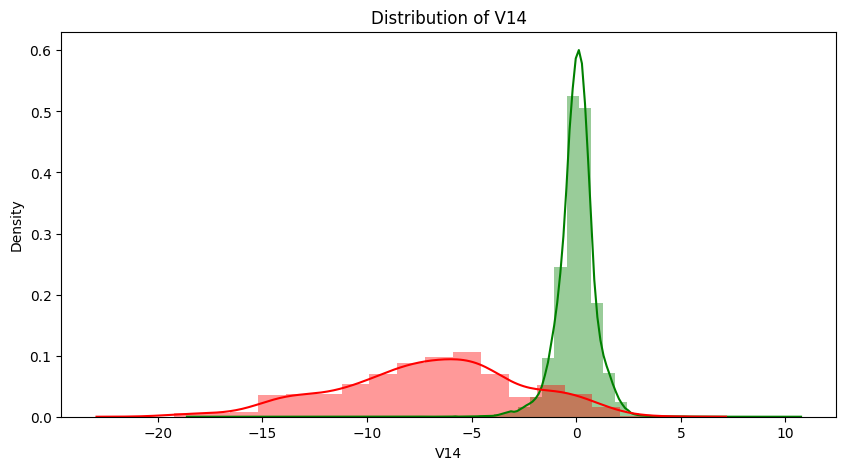

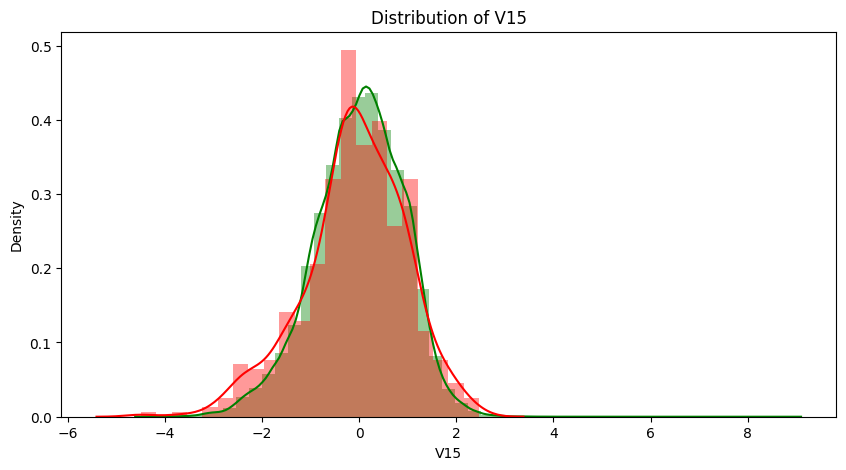

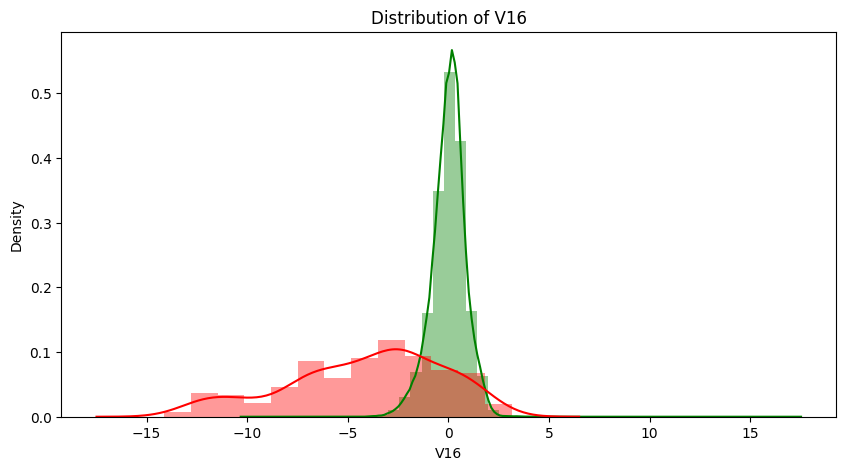

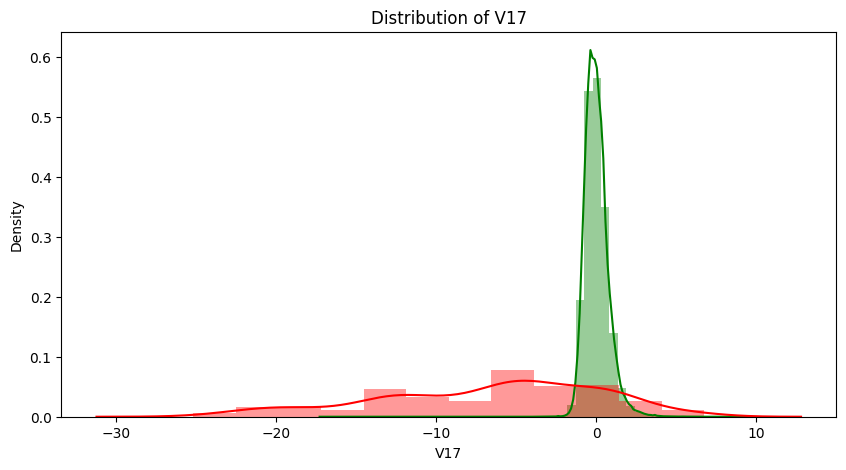

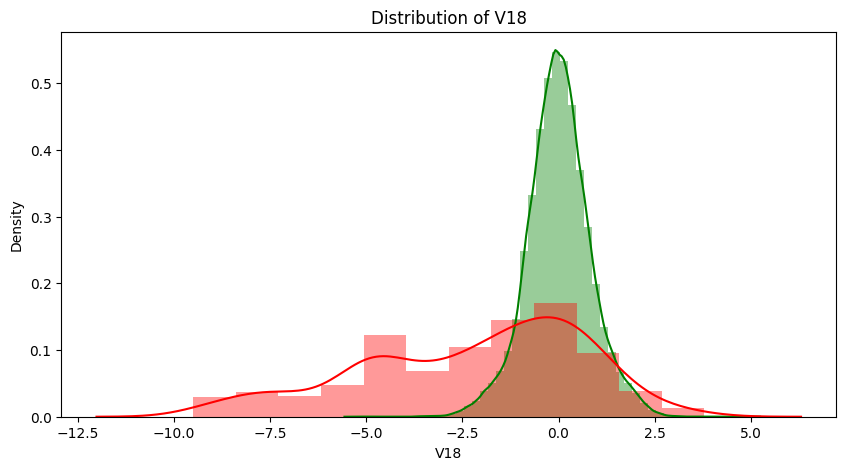

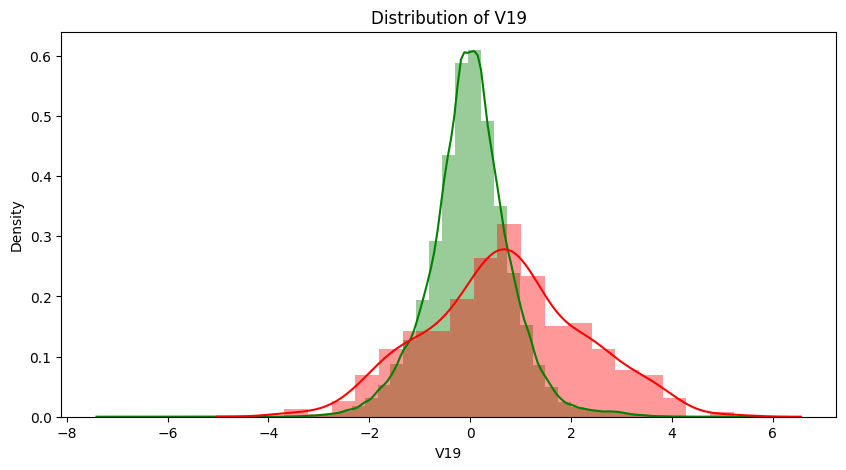

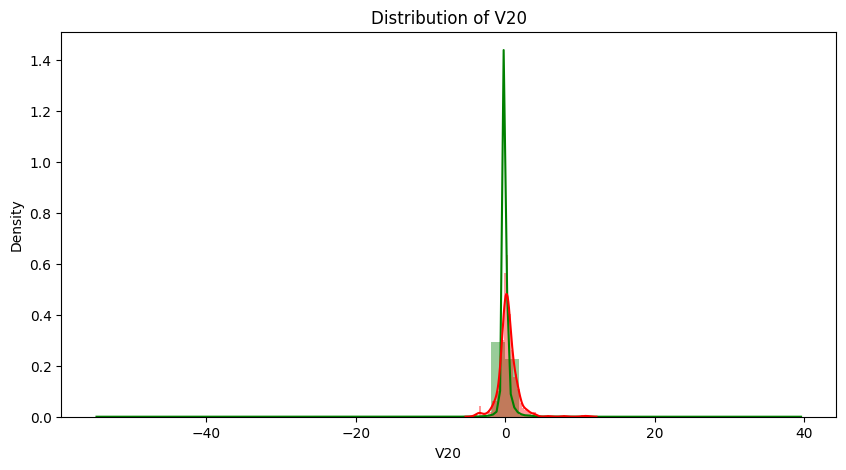

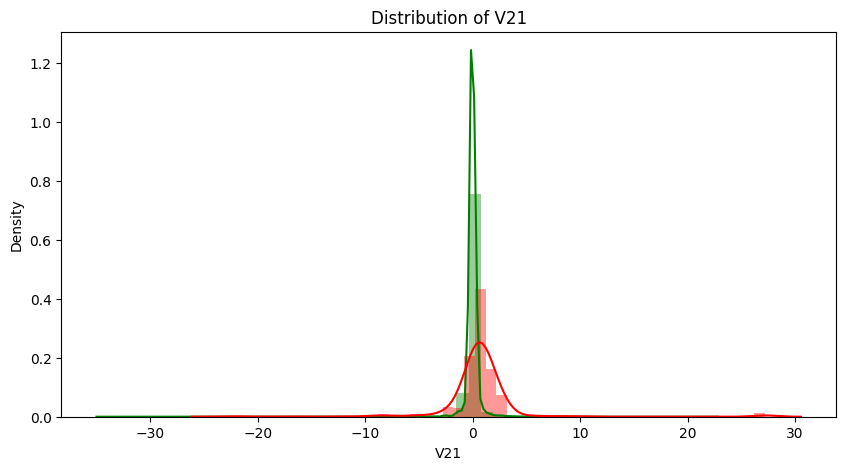

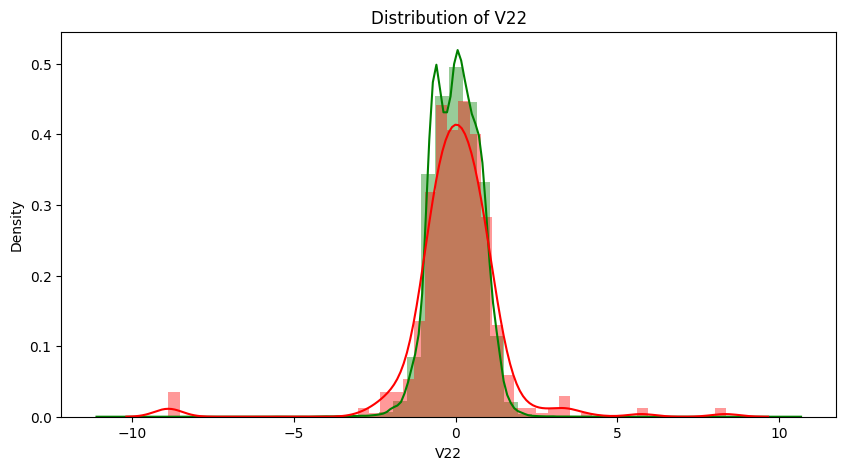

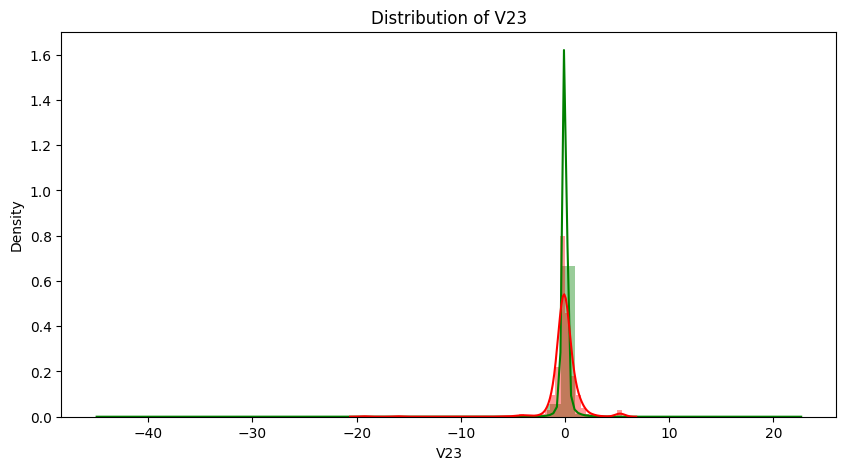

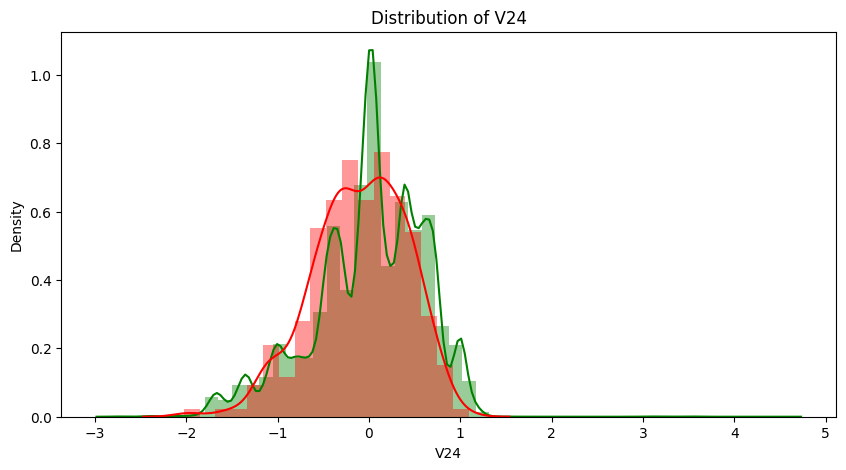

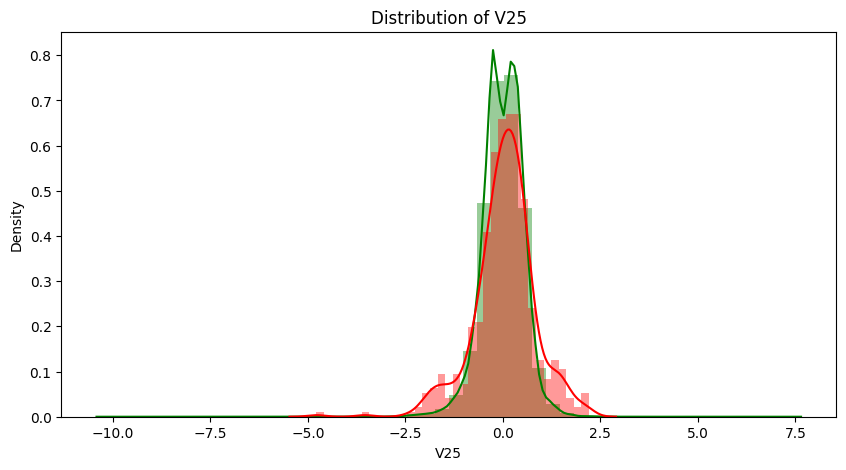

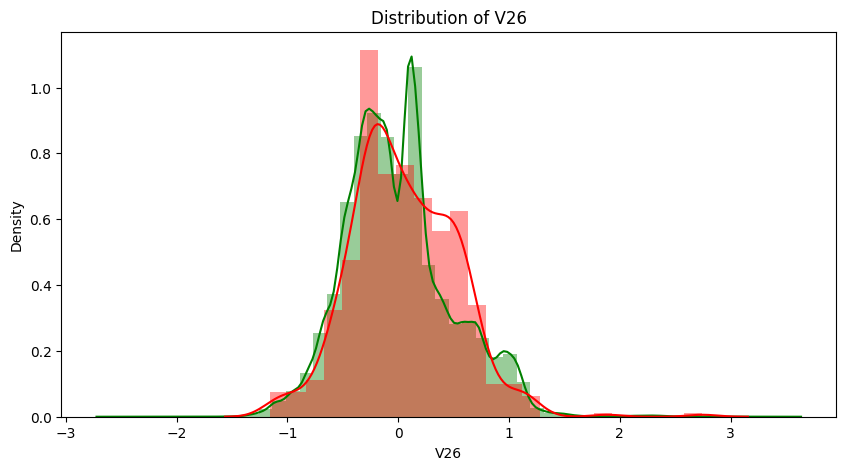

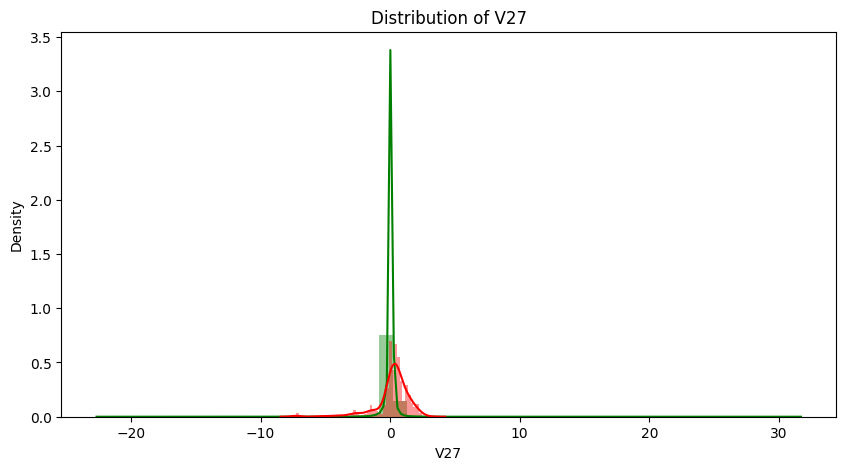

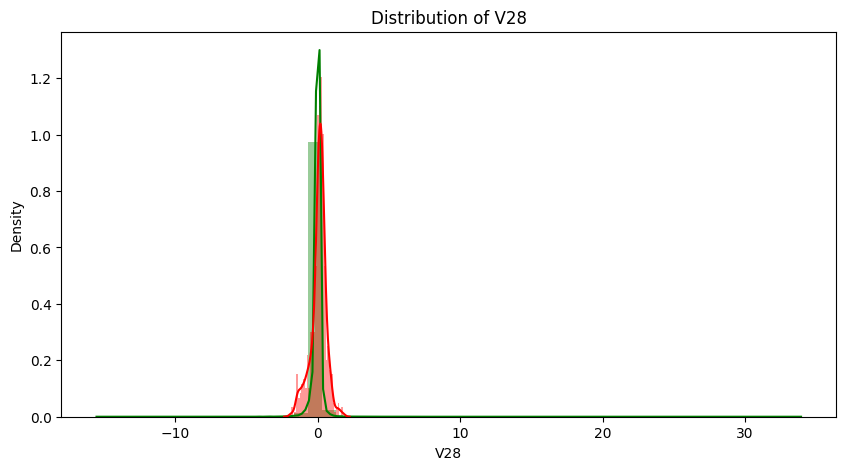

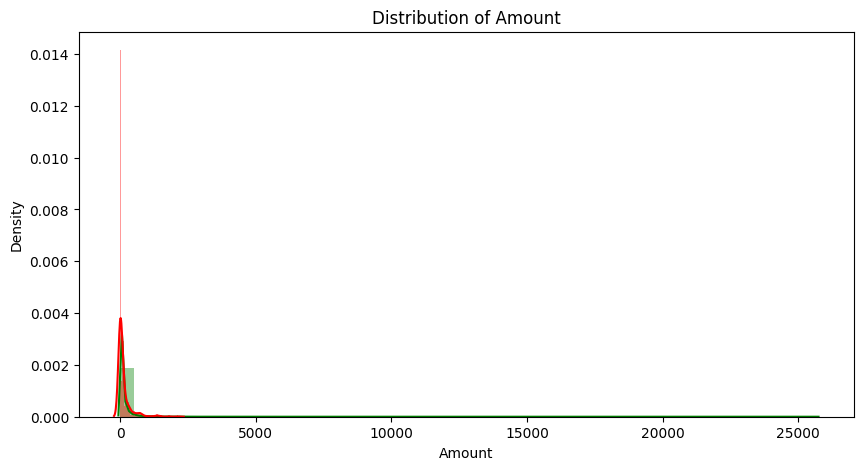

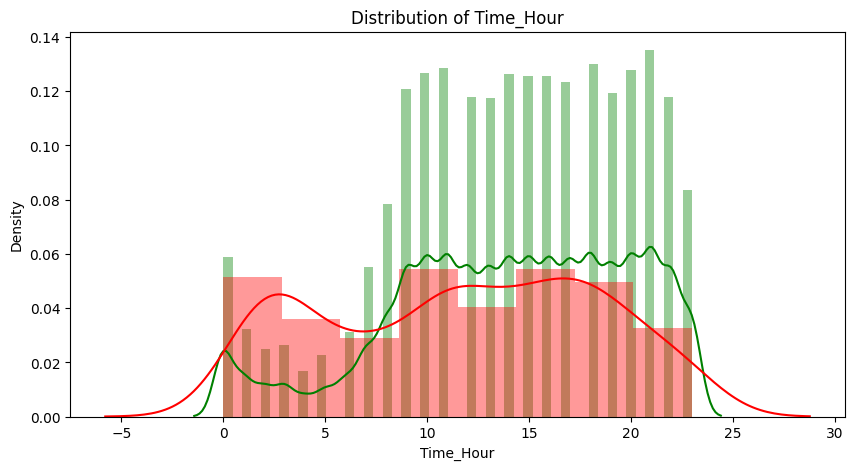

In [23]:
# prompt: plot histogram for each columns in the dataset to see skewness

for col in cols:
  plt.figure(figsize=(10,5))
  sns.distplot(X[col][normal_records], color="green")
  sns.distplot(X[col][fraud_records], color="red")
  plt.title("Distribution of "+col)
  plt.show()


# Module Building

In [24]:
df_results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])

In [25]:
#Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent', 'Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]), fontsize=12)
  plt.show()


In [26]:
def buildAndRunLogisticModels(df_results, Methodology, X_train, y_train, X_test, y_test):
  #Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
      Cs = num_C,
      penalty='l2',
      scoring='roc_auc',
      cv=cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='newton-cg',
      tol=10

  )

  searchCV_l1 = linear_model.LogisticRegressionCV(
      Cs=num_C,
      penalty='l1',
      scoring='roc_auc',
      cv=cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='liblinear',
      tol=10
  )

  linearl1 = searchCV_l1.fit(X_train, y_train)
  linearl2 = searchCV_l2.fit(X_train, y_train)

  print("Max auc_roc for l1:", searchCV_l1.scores_[1].mean(axis=0).max())
  print("Max auc_roc for l2:", searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)

  #find predicted values
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)


  #find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]

  #Accuracy of L2/L1 models
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

  print("Accuracy of Logistic Model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("Classification report")
  print(classification_report(y_test,y_pred_l1))



  print("Accuracy of Logistic Model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("Classification report")
  print(classification_report(y_test,y_pred_l2))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value : {0}".format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold : {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset {0}".format(roc_auc))
  plt.plot(fpr,tpr, label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_results_l1 = pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L2 Regularisation', 'Accuracy': Accuracy_l2, 'roc_value':l2_roc_value, 'threshold':threshold}, index=[0])
  df_results = pd.concat([df_results, df_results_l1])

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value : {0}".format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold : {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset {0}".format(roc_auc))
  plt.plot(fpr,tpr, label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_results_l2 = pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L1 Regularisation', 'Accuracy': Accuracy_l1, 'roc_value':l1_roc_value, 'threshold':threshold}, index=[0])
  df_results = pd.concat([df_results, df_results_l2])
  return df_results

In [27]:
def buildAndRunKNNModels(df_results, Methodology, X_train,y_train,X_test,y_test):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors =5, n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test, y_test)
  print("model score")
  print(score)

  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))

  knn_probs = knn.predict_proba(X_test)[:,1]

  #calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}".format(knn_roc_value))
  fpr,tpr,thresholds = metrics.roc_curve(y_test, knn_probs)
  print(fpr,"===", tpr,"=====", thresholds)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset {0}".format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_results_knn= pd.DataFrame({'Methodology': Methodology, 'Model' : 'KNN', 'Accuracy': score, 'roc_value':knn_roc_value, 'threshold':threshold}, index=[0])
  df_results = pd.concat([df_results, df_results_knn])
  return df_results

In [28]:
def buildAndRunTreeModels(df_results, Methodology, X_train,y_train,X_test,y_test):
  #Evalute Decision tree model with 'gini' and 'entropy'
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
    dt = DecisionTreeClassifier(criterion = c, random_state=42)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    test_score = dt.score(X_test, y_test)
    tree_preds = dt.predict_proba(X_test)[:,1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score
    print(c + " score: {0}".format(test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred)
    print("classification Report")
    print(classification_report(y_test,y_pred))
    print(c + " tree_roc_value: {0}".format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("Roc for the test dataset {0}".format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_results_tree = pd.DataFrame({'Methodology': Methodology, 'Model': 'Tree Model with {0} criteria'.format(c), 'Accuracy': test_score, 'roc_value': tree_roc_value, 'threshold':threshold}, index=[0])
    df_results = pd.concat([df_results, df_results_tree])
  return df_results

In [29]:
def buildAndRunRandomForestModel(df_results, Methodology, X_train, y_train, X_test, y_test):
  #Evaluate Random Forest Model
  #Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features = 'sqrt', random_state=42)

  #fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))

  #Actual Class predictions
  rf_prediction = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_prediction)
  print("classificaation Report")
  print(classification_report(y_test, rf_prediction))

  #Probalilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:,1]

  #Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}".format(roc_value))
  fpr,tpr,thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test datatest {0}".format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_results_random = pd.DataFrame({'Methodology':Methodology, 'Model': 'Random Forcast', 'Accuracy': RF_test_score, 'roc_value': roc_value, 'threshold': threshold}, index=[0])
  df_results = pd.concat([df_results, df_results_random])

  return df_results

In [30]:
def buildAndRunXGBoostModel(df_results, Methodology, X_train, y_train, X_test,y_test):
  #Evaluate XGboost model

  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print("Model Accuracy: {0}".format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification report")
  print(classification_report(y_test, y_pred))
  #probailities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:,1]

  #calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGBoost roc_value: {0}".format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset {0}".format(roc_auc))
  plt.plot(fpr,tpr,label="Test ,auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_results_XG = pd.DataFrame({'Methodology':Methodology, 'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'roc_value': XGB_roc_value, 'threshold': threshold}, index=[0])
  df_results = pd.concat([df_results, df_results_XG])
  return df_results

In [31]:
#create a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_results, Methodology, X_train, y_train,X_test,y_test):
  #Evaluate SVM model with sigmoid kernel model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train, y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test, y_pred_SVM)
  print("accuracy_score: {0}".format(SVM_Score))
  print("confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test,y_pred_SVM))

  #Run classifier
  classifier = SVC(kernel='sigmoid', probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

  #Calculate roc auc
  roc_value = roc_auc_score(y_test,svm_probs)

  print("SVM roc_value: {0}".format(roc_value))
  fpr, tpr,thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr,tpr)
  print("ROC for the test dataset {0}".format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_results_SVM = pd.DataFrame({'Methodology':Methodology, 'Model': 'SVM', 'Accuracy': SVM_Score, 'roc_value': roc_value, 'threshold': threshold}, index=[0])
  df_results = pd.concat([df_results, df_results_SVM])
  return df_results


# Perform Cross validation with RepeatedKFold

In [32]:
#lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

#X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
  print("TRAIN: ", train_index, "Test:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN:  [     0      1      3 ... 284803 284805 284806] Test: [     2      5      6 ... 284793 284800 284804]
TRAIN:  [     1      2      4 ... 284804 284805 284806] Test: [     0      3      8 ... 284788 284798 284799]
TRAIN:  [     0      2      3 ... 284800 284804 284806] Test: [     1     11     14 ... 284802 284803 284805]
TRAIN:  [     0      1      2 ... 284804 284805 284806] Test: [     4      9     10 ... 284778 284783 284790]
TRAIN:  [     0      1      2 ... 284803 284804 284805] Test: [     7     16     26 ... 284794 284795 284806]
TRAIN:  [     0      1      2 ... 284802 284804 284806] Test: [     7      8     10 ... 284800 284803 284805]
TRAIN:  [     0      1      2 ... 284803 284804 284805] Test: [     3      5      9 ... 284793 284794 284806]
TRAIN:  [     2      3      4 ... 284804 284805 284806] Test: [     0      1      6 ... 284770 284792 284795]
TRAIN:  [     0      1      2 ... 284803 284805 284806] Test: [     4     12     14 ... 284791 284801 284804]
TRAIN:  [ 

Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.9750045580962752
Max auc_roc for l2: 0.9849166600618394
Parameters for l1 regularisations
[[-0.05865891 -0.13034045 -0.18327685  0.06818871 -0.25752952  0.08985774
   0.11173469 -0.03274944 -0.13973269 -0.14176042 -0.03614529  0.01095025
  -0.13926329 -0.21705582  0.01550417 -0.11386188 -0.21594365  0.02869247
   0.00922268  0.22463427  0.08880159 -0.03245422 -0.03570574 -0.00982938
  -0.03435658  0.00541652 -0.0513917   0.00463758 -0.00651919 -0.11641003]]
[-2.10149154]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.56698158,
        0.54565246, 0.54840599, 0.91445425, 0.93869045, 0.95166633,
        0.9201745 , 0.92932419, 0.95133642, 0.93407838, 0.93784705,
        0.9466516 , 0.92158045, 0.95553736, 0.95357731, 0.9906845 ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.57643409,
        0.55612528, 0.56400274, 0.88643604, 0.87356982, 0.89510603,
        0.84982019, 0.86852536, 0.91195

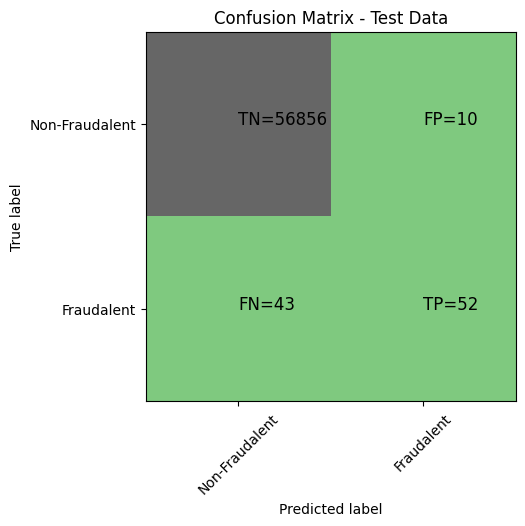

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.55      0.66        95

    accuracy                           1.00     56961
   macro avg       0.92      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Model with l2 regularisation : 0.9990519829356929
Confusion Matrix


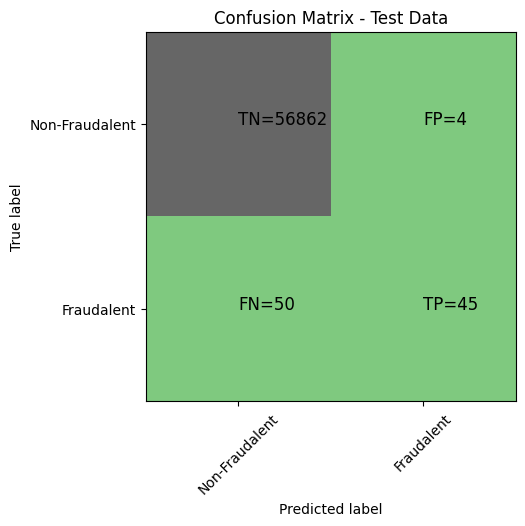

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.92      0.47      0.62        95

    accuracy                           1.00     56961
   macro avg       0.96      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value : 0.9766366731022328
l2 threshold : 0.0012343714040157112
ROC for the test dataset 0.9766366731022328


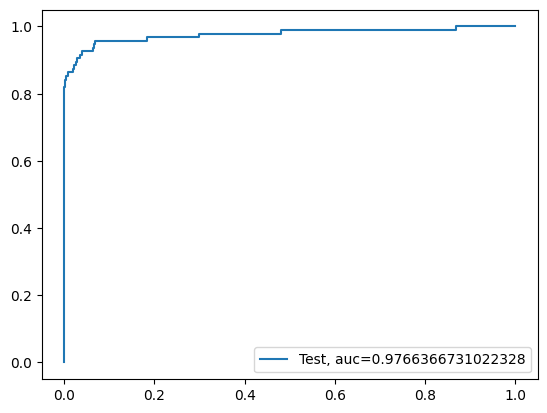

l1 roc_value : 0.8835670930923483
l1 threshold : 0.04696059779351526
ROC for the test dataset 0.8835670930923483


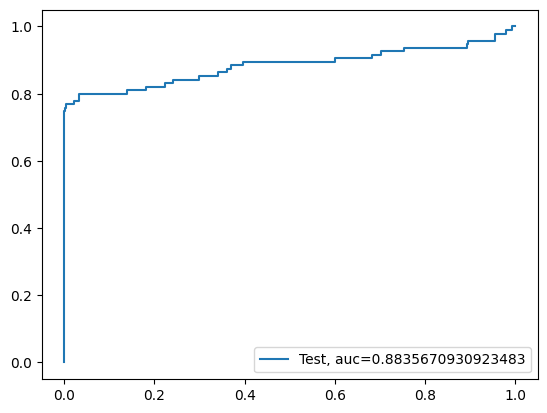

Time Taken by Model: ----238.4943869113922 Seconds------
------------------------------------------------------------
KNN Model
model score
0.9992977651375503
Confusion Matrix


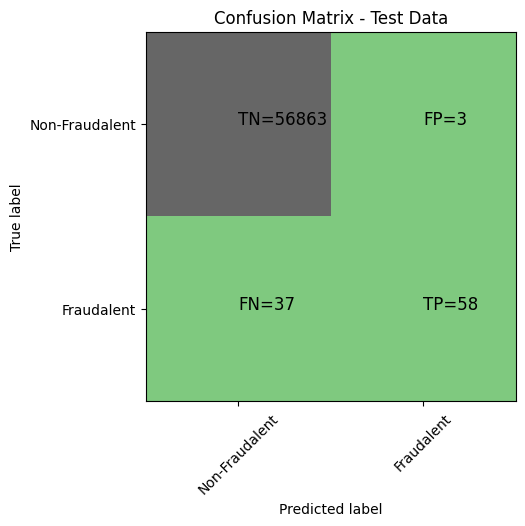

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.95      0.61      0.74        95

    accuracy                           1.00     56961
   macro avg       0.98      0.81      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8577103699000606
[0.00000000e+00 5.27556009e-05 5.27556009e-05 5.27556009e-05
 1.05511202e-04 8.96845215e-04 1.00000000e+00] === [0.         0.38947368 0.54736842 0.61052632 0.65263158 0.71578947
 1.        ] ===== [inf 1.  0.8 0.6 0.4 0.2 0. ]
KNN threshold: 0.2
ROC for the test dataset 0.8577103699000606


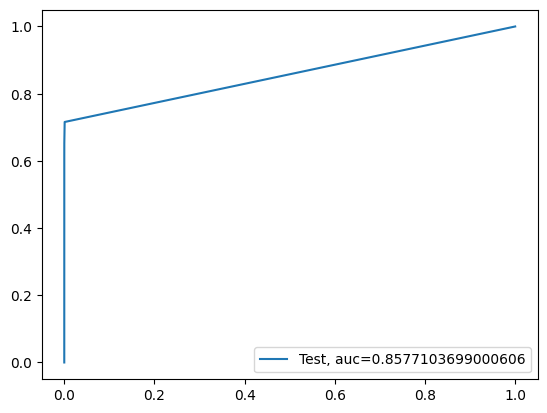

Time Taken by Model: ----65.92406797409058 Seconds------
------------------------------------------------------------
Decision Tree Model with 'gini' and 'entropy' criteria
gini score: 0.9990870946788153
Confusion Matrix


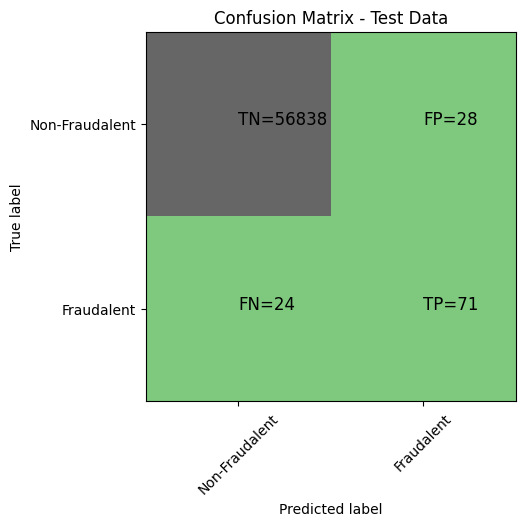

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.75      0.73        95

    accuracy                           1.00     56961
   macro avg       0.86      0.87      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8734380177221798
Tree threshold: 1.0
Roc for the test dataset 0.8734380177221798


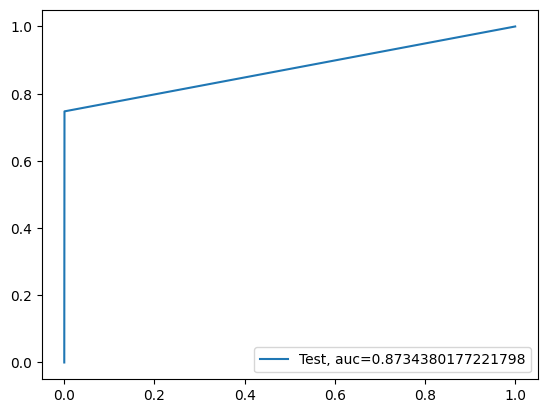

entropy score: 0.9992275416513052
Confusion Matrix


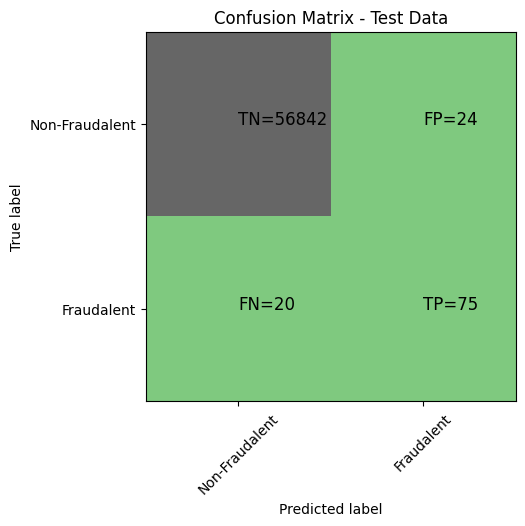

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.76      0.79      0.77        95

    accuracy                           1.00     56961
   macro avg       0.88      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.894525819701718
Tree threshold: 1.0
Roc for the test dataset 0.894525819701718


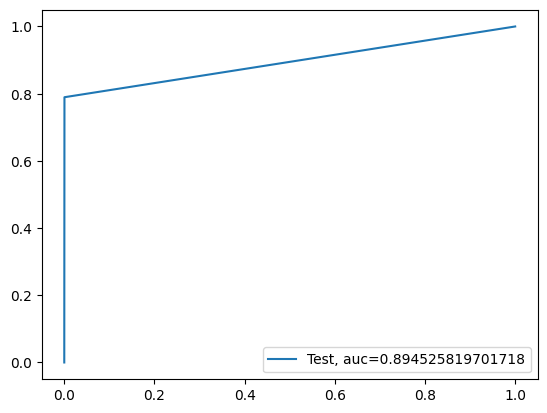

Time Taken by Model: ----30.76630187034607 Seconds------
------------------------------------------------------------
Random Forest
Model Accuracy: 0.9995786590825302
Confusion Matrix


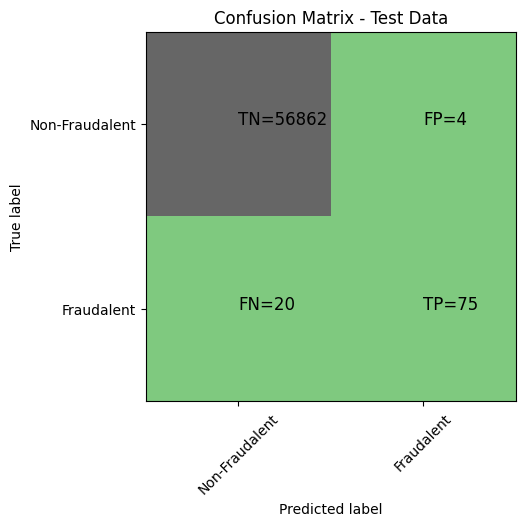

classificaation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.95      0.79      0.86        95

    accuracy                           1.00     56961
   macro avg       0.97      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9458465607975908
Random forest threshold: 0.01
ROC for the test datatest 0.9458465607975908


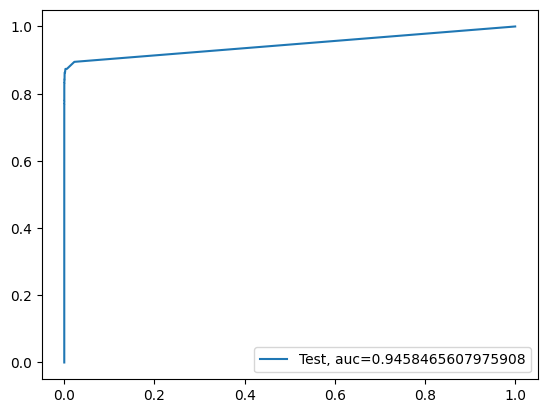

Time Taken by Model: ----212.44280791282654 Seconds------
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995962149540913
Confusion Matrix


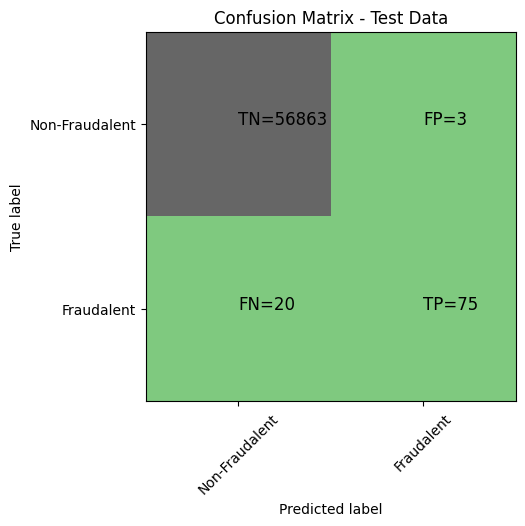

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.96      0.79      0.87        95

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9739966717694599
XGBoost threshold: 0.00011436881322879344
ROC for the test dataset 0.9739966717694599


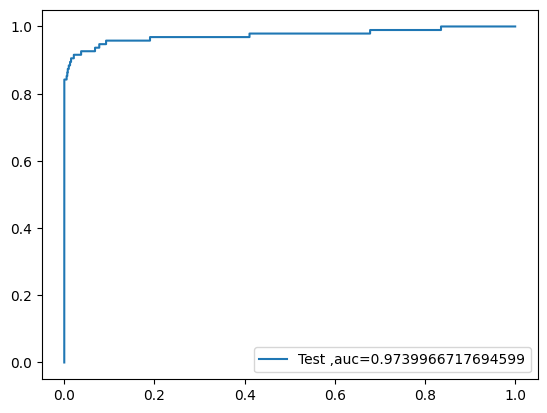

Time Taken by Model: ----2.7552132606506348 Seconds------
------------------------------------------------------------
SVM Model
accuracy_score: 0.9984550833026106
confusion Matrix


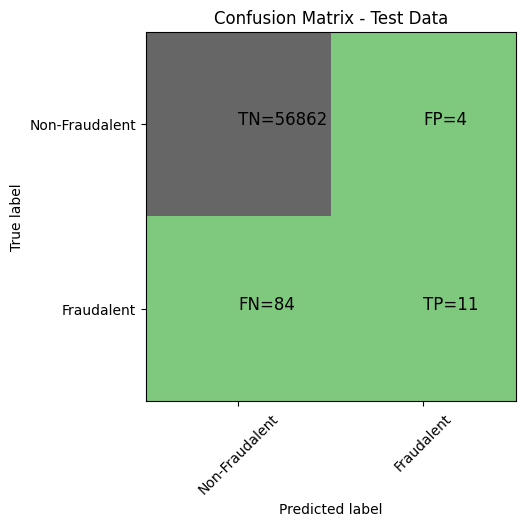

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.12      0.20        95

    accuracy                           1.00     56961
   macro avg       0.87      0.56      0.60     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.48725295107427063
SVM threshold: 0.0022559384298320817
ROC for the test dataset 0.48725295107427063


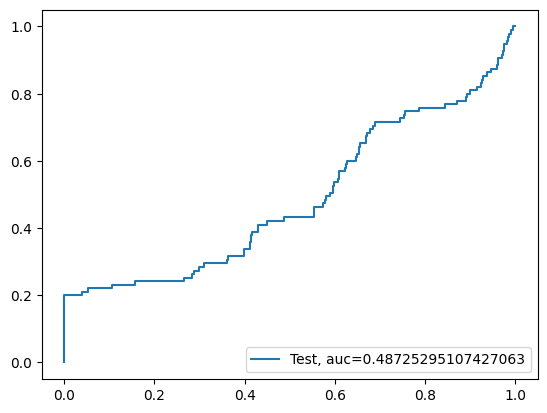

Time Taken by Model: ----202.27320408821106 Seconds------
------------------------------------------------------------


In [33]:
#Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_results = buildAndRunLogisticModels(df_results, 'RepeatedKFold Cross Validation', X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_results = buildAndRunKNNModels(df_results, "RepeatedKFold Cross Validation", X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# #Run Decision Tree Models with 'gini and 'entropy' criteria
print("Decision Tree Model with 'gini' and 'entropy' criteria")
start_time = time.time()
df_results = buildAndRunTreeModels(df_results, "RepeatedKFold Cross Validation", X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# # #Run Random Forest Model
print("Random Forest")
start_time = time.time()
df_results = buildAndRunRandomForestModel(df_results, "RepeatedKFold Cross Validation", X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# # #Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_results = buildAndRunXGBoostModel(df_results, "RepeatedKFold Cross Validation", X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)


# # #Run SVM Model
print("SVM Model")
start_time = time.time()
df_results = buildAndRunSVMModels(df_results, "RepeatedKFold Cross Validation", X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

In [34]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999052,0.976637,0.001234
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999070,0.883567,0.046961
0,RepeatedKFold Cross Validation,KNN,0.999298,0.857710,0.200000
0,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999087,0.873438,1.000000
0,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.894526,1.000000
0,RepeatedKFold Cross Validation,Random Forcast,0.999579,0.945847,0.010000
0,RepeatedKFold Cross Validation,XGBoost,0.999596,0.973997,0.000114
0,RepeatedKFold Cross Validation,SVM,0.998455,0.487253,0.002256


# **Results for Cross Validation with RepeatedKFold**
Looking at Accuracy and ROC value we have "Logistic Regression with L2 Regularisation" which has provided best results for cross validation with RepeatedKFold Technique.

# Perform cross validation with StratifiedKFold

In [35]:
#lets perform stratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.9652106893977332
Max auc_roc for l2: 0.9823918452680521
Parameters for l1 regularisations
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.944815

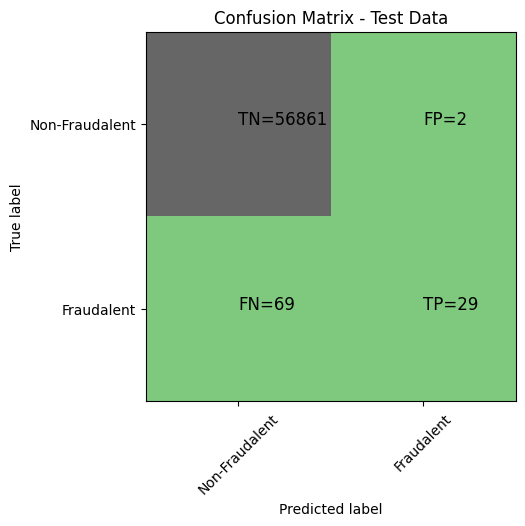

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Model with l2 regularisation : 0.998771088990713
Confusion Matrix


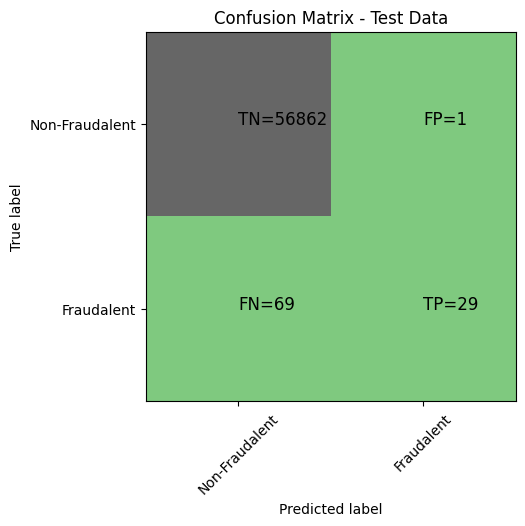

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value : 0.9833089699661234
l2 threshold : 0.0015734477753883214
ROC for the test dataset 0.9833089699661234


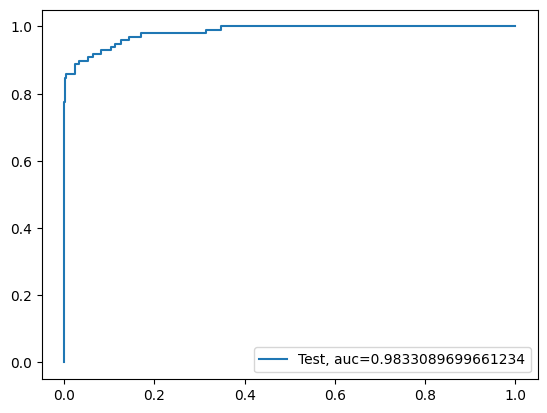

l1 roc_value : 0.8890758561483437
l1 threshold : 0.021087492766199874
ROC for the test dataset 0.8890758561483437


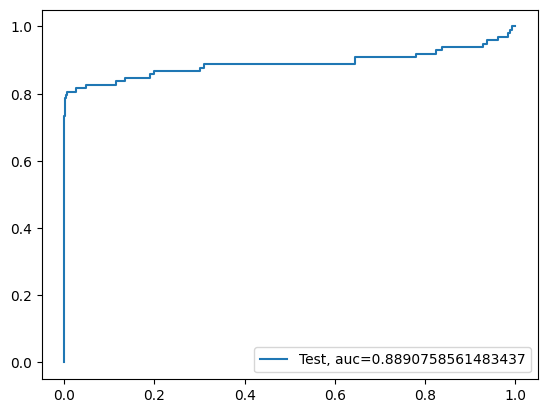

Time Taken by Model: ----243.39691615104675 Seconds------
------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


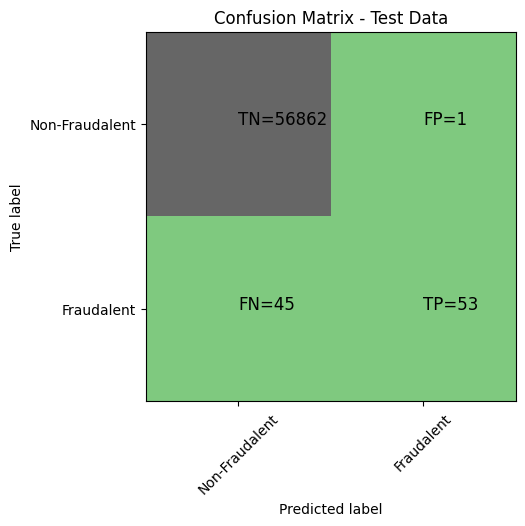

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75861281e-05
 8.79306403e-05 1.74102668e-03 1.00000000e+00] === [0.         0.39795918 0.52040816 0.54081633 0.57142857 0.6122449
 1.        ] ===== [inf 1.  0.8 0.6 0.4 0.2 0. ]
KNN threshold: 0.2
ROC for the test dataset 0.8057457828285457


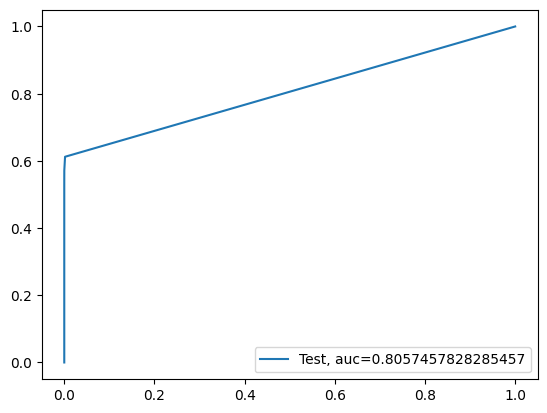

Time Taken by Model: ----66.21152997016907 Seconds------
------------------------------------------------------------
Decision Tree Model with 'gini' and 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


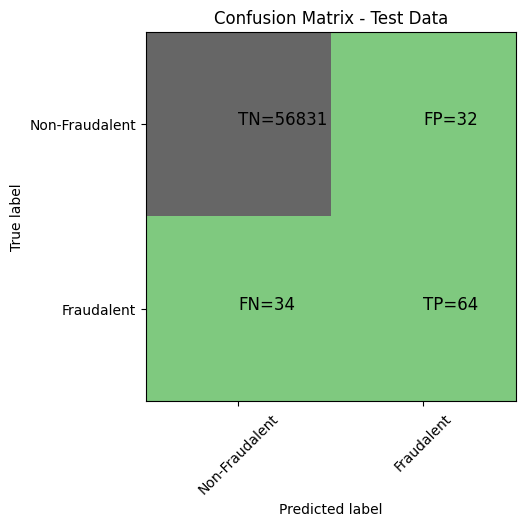

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
Roc for the test dataset 0.8262492341959029


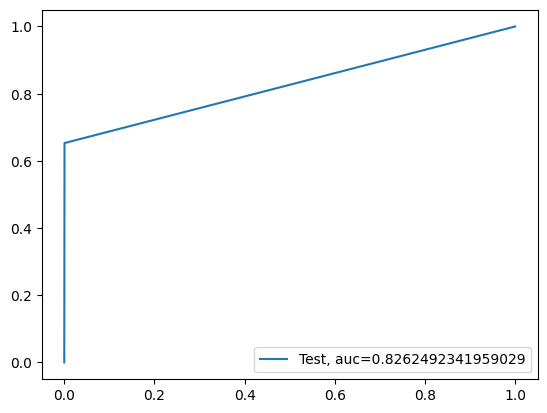

entropy score: 0.9990168711925703
Confusion Matrix


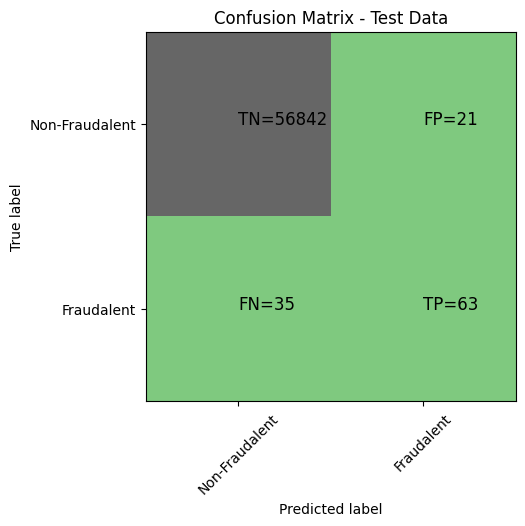

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
Roc for the test dataset 0.8212439170839185


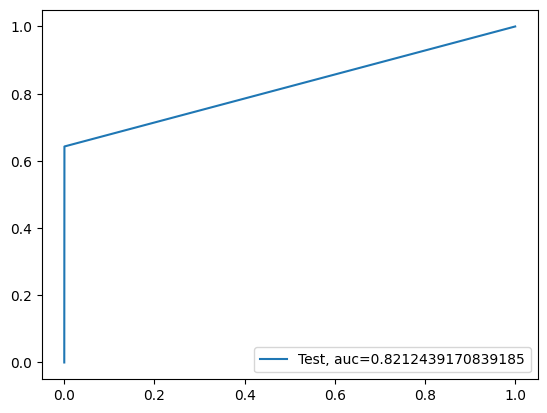

Time Taken by Model: ----30.901755809783936 Seconds------
------------------------------------------------------------
Random Forest
Model Accuracy: 0.9994382121100402
Confusion Matrix


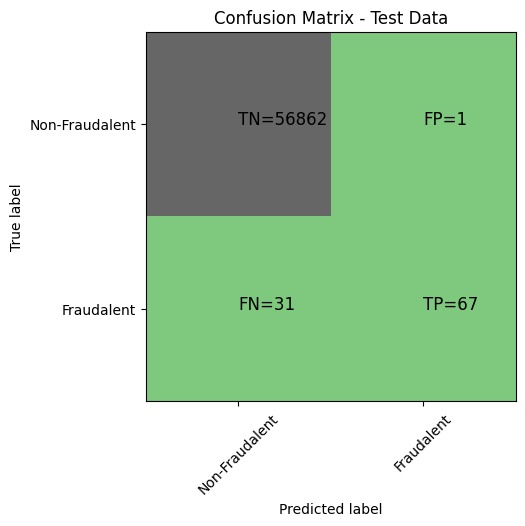

classificaation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random forest threshold: 0.01
ROC for the test datatest 0.9464721329855826


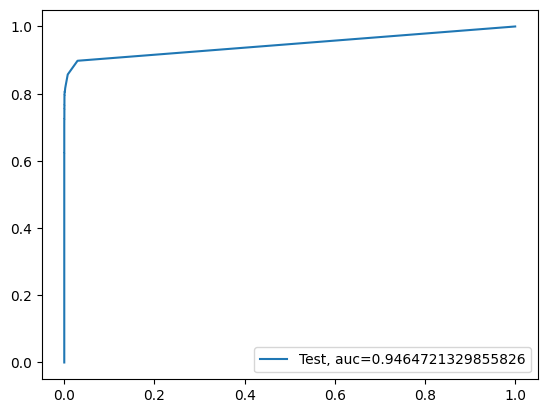

Time Taken by Model: ----201.3875298500061 Seconds------
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


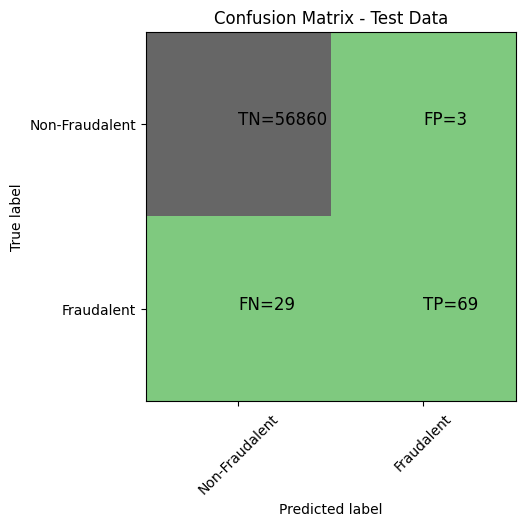

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 0.9722049451474309


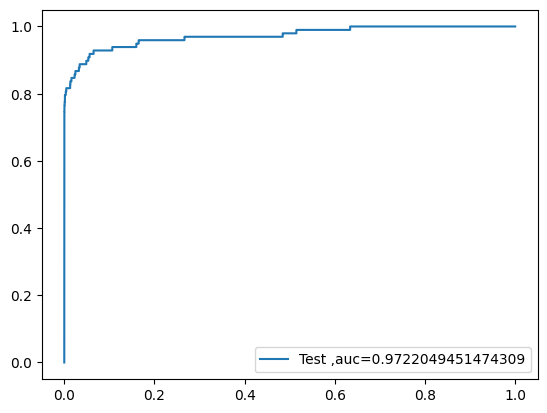

Time Taken by Model: ----2.2864890098571777 Seconds------
------------------------------------------------------------


In [36]:
#Run Logistic regresssion with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_results = buildAndRunLogisticModels(df_results, 'StratifiedKFold Cross Validation', X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_results = buildAndRunKNNModels(df_results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# #Run Decision Tree Models with 'gini and 'entropy' criteria
print("Decision Tree Model with 'gini' and 'entropy' criteria")
start_time = time.time()
df_results = buildAndRunTreeModels(df_results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# # #Run Random Forest Model
print("Random Forest")
start_time = time.time()
df_results = buildAndRunRandomForestModel(df_results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# # #Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_results = buildAndRunXGBoostModel(df_results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)


# # # #Run SVM Model
# print("SVM Model")
# start_time = time.time()
# df_results = buildAndRunSVMModels(df_results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
# print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
# print('-'*60)

In [37]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999052,0.976637,0.001234
0,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999070,0.883567,0.046961
0,RepeatedKFold Cross Validation,KNN,0.999298,0.857710,0.200000
0,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999087,0.873438,1.000000
0,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.894526,1.000000
0,RepeatedKFold Cross Validation,Random Forcast,0.999579,0.945847,0.010000
0,RepeatedKFold Cross Validation,XGBoost,0.999596,0.973997,0.000114
0,RepeatedKFold Cross Validation,SVM,0.998455,0.487253,0.002256
0,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983309,0.001573
0,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


Proceed with the model which shows the best result



*   Apply the best hyperparameter on the model
*   Predict on the test dataset



In [38]:
#Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10,10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs = num_C,
    penalty = 'l2',
    scoring = 'roc_auc',
    cv = cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print("Max auc_roc for l2: ", clf.scores_[1].mean(axis=0).max())

print("Parameter for l2 regularisation")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

#find predicted values
y_pred_l2 = clf.predict(X_test)

#find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

#accuracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print("Accuracy of Logistic model with l2 regularisation: {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2:  0.9823918452680521
Parameter for l2 regularisation
[[ 0.00674973  0.0618385  -0.06715469  0.21888891  0.05408194 -0.03198817
  -0.02285911 -0.11498334 -0.06944766 -0.16375255  0.12799688 -0.1921098
  -0.0369717  -0.36080323  0.00346828 -0.08790793 -0.07258562 -0.0006664
   0.00390205 -0.0282766   0.03814578  0.02342764 -0.01160585 -0.00998604
  -0.00653765  0.00632251 -0.01008571 -0.00166414  0.00040046  0.00073183]]
[-7.43456015]
{1: array([[0.69243958, 0.69420264, 0.71447445, 0.83768913, 0.95579724,
        0.97136042, 0.98915673, 0.99473675, 0.99078564, 0.99122866,
        0.99122866, 0.99122866, 0.99122866, 0.99122866, 0.99122866,
        0.99122866, 0.99122866, 0.99122866, 0.99122866, 0.99122866],
       [0.60696687, 0.60861563, 0.62910528, 0.768803  , 0.90898917,
        0.94878196, 0.9603747 , 0.98264691, 0.98536146, 0.98263288,
        0.98263288, 0.97925396, 0.97925396, 0.97925396, 0.97925396,
        0.97925396, 0.97925396, 0.97925396, 0.97925396, 0.97925

In [39]:
clf.coef_

array([[ 0.00674973,  0.0618385 , -0.06715469,  0.21888891,  0.05408194,
        -0.03198817, -0.02285911, -0.11498334, -0.06944766, -0.16375255,
         0.12799688, -0.1921098 , -0.0369717 , -0.36080323,  0.00346828,
        -0.08790793, -0.07258562, -0.0006664 ,  0.00390205, -0.0282766 ,
         0.03814578,  0.02342764, -0.01160585, -0.00998604, -0.00653765,
         0.00632251, -0.01008571, -0.00166414,  0.00040046,  0.00073183]])

In [40]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis=1)
coefficients.columns = ['Feature', 'Importance Coefficient']

In [41]:
coefficients

,Feature,Importance Coefficient
0,V1,0.006750
1,V2,0.061839
2,V3,-0.067155
3,V4,0.218889
4,V5,0.054082
5,V6,-0.031988
6,V7,-0.022859
7,V8,-0.114983
8,V9,-0.069448
9,V10,-0.163753


# Print the important features of the best model to understand the dataset

*   This will not give much explanation on the alreayd transformed dataset
*   But it will help us in understanding if the dataset is not PCA transformed



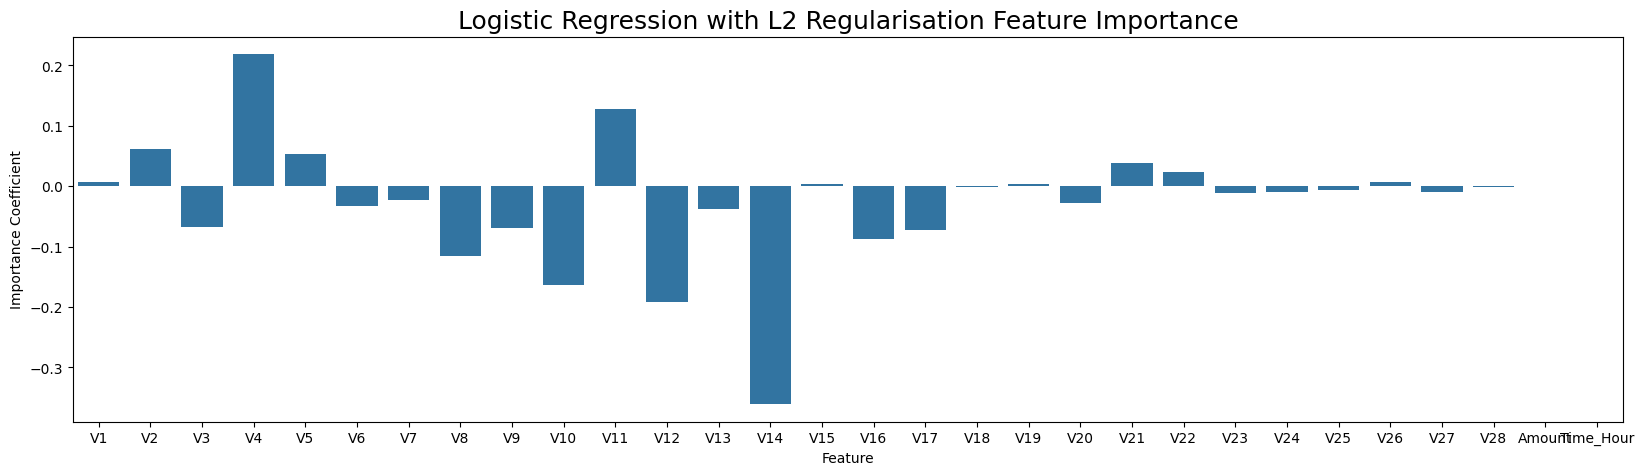

In [42]:
#Ploting the coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

In [43]:
pip install imblearn


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Hence it shows that v14,v5,v11 has +ve importance whereas v10,v12,v14 have -ve impact  on the predictions

# Model Building with balancing Classes

## Perform class balancing wiht:


*   Random Oversampling
*   SMOTE
*   ADASYN



# Oversampling with RandomOversampler with StratifiedKFold cross validation


*   we will use Random Oversampling method to handle the class imbalance


In [44]:
#Create thed ataset with RandomOversampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y),1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  ROS = RandomOverSampler(sampling_strategy=0.5)
  X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9867277539372088
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

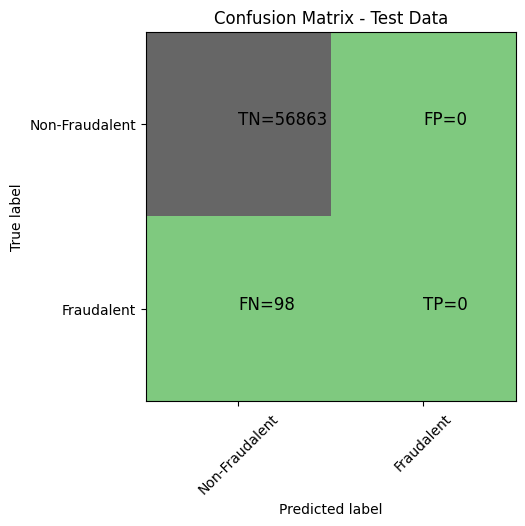

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Model with l2 regularisation : 0.9855515177050965
Confusion Matrix


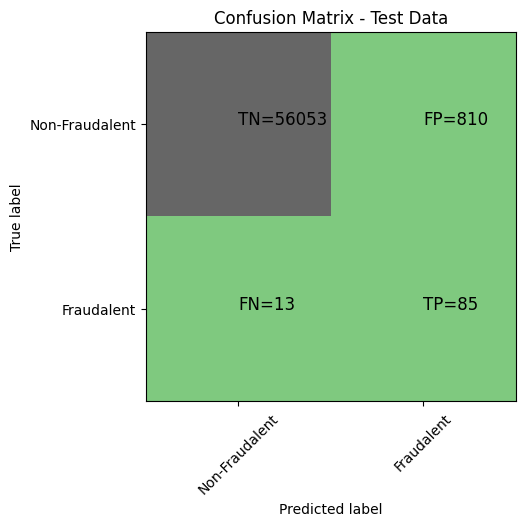

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

l2 roc_value : 0.9809025416261856
l2 threshold : 0.4470666303785161
ROC for the test dataset 0.9809025416261856


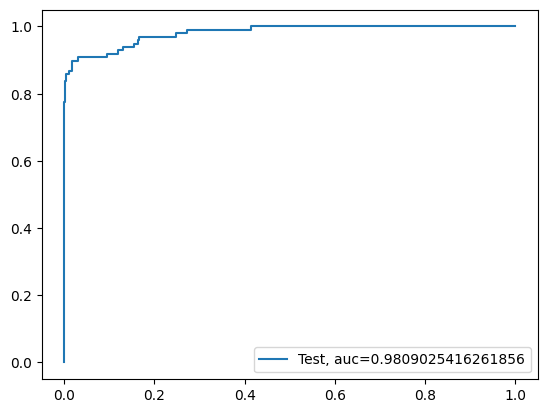

l1 roc_value : 0.5
l1 threshold : inf
ROC for the test dataset 0.5


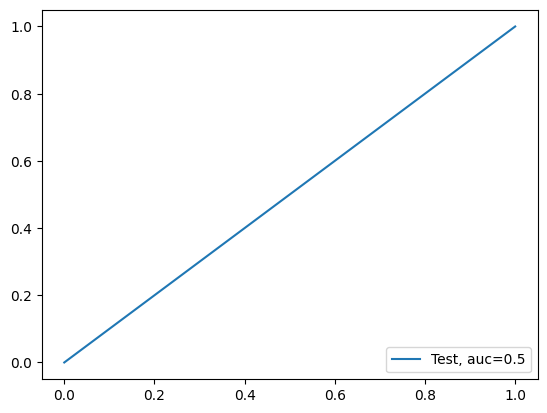

Time Taken by Model: ----347.7184519767761 Seconds------
------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


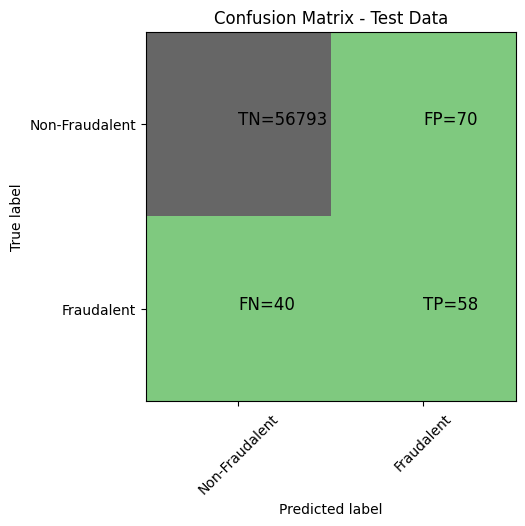

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
[0.00000000e+00 4.74825458e-04 9.32064787e-04 1.23102896e-03
 1.49482089e-03 1.74102668e-03 1.00000000e+00] === [0.         0.57142857 0.59183673 0.59183673 0.60204082 0.6122449
 1.        ] ===== [inf 1.  0.8 0.6 0.4 0.2 0. ]
KNN threshold: 0.2
ROC for the test dataset 0.805604465728046


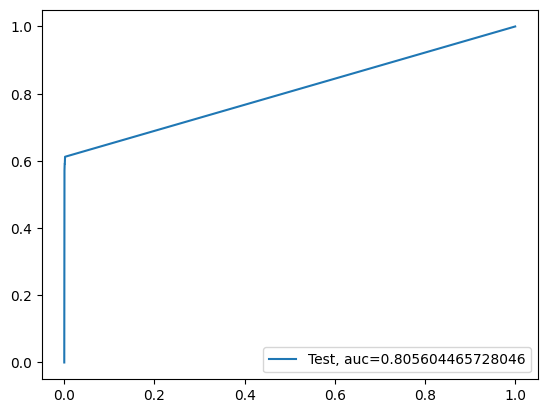

Time Taken by Model: ----97.4281051158905 Seconds------
------------------------------------------------------------
Decision Tree Model with 'gini' and 'entropy' criteria
gini score: 0.9989115359632029
Confusion Matrix


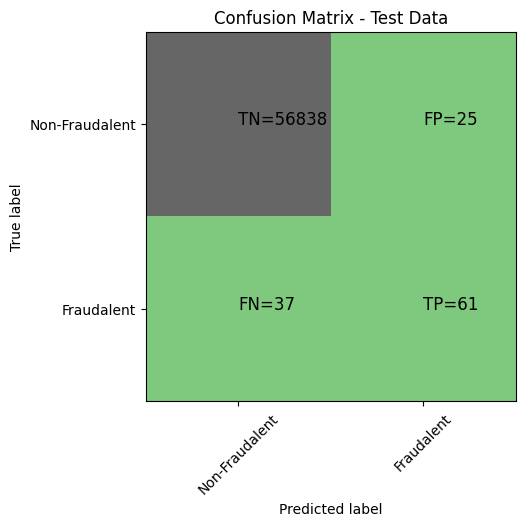

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.62      0.66        98

    accuracy                           1.00     56961
   macro avg       0.85      0.81      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8110046631951411
Tree threshold: 1.0
Roc for the test dataset 0.8110046631951411


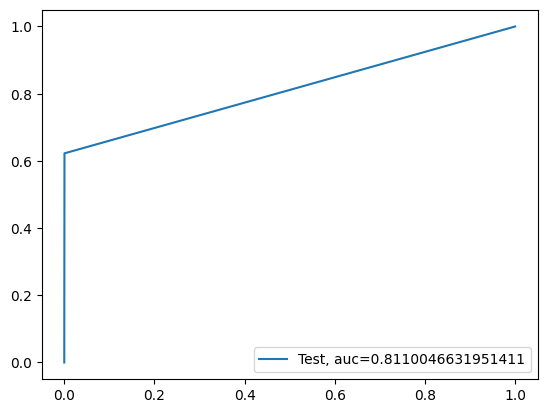

entropy score: 0.9992275416513052
Confusion Matrix


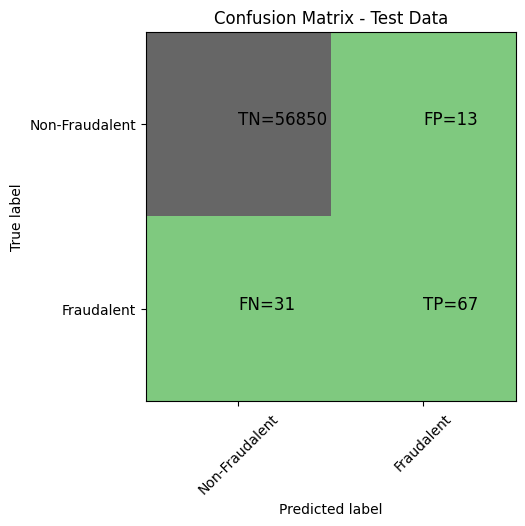

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.68      0.75        98

    accuracy                           1.00     56961
   macro avg       0.92      0.84      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8417224248614734
Tree threshold: 1.0
Roc for the test dataset 0.8417224248614734


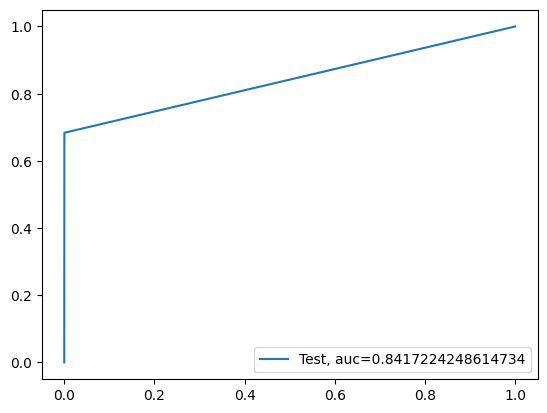

Time Taken by Model: ----20.03054118156433 Seconds------
------------------------------------------------------------
Random Forest
Model Accuracy: 0.999490879724724
Confusion Matrix


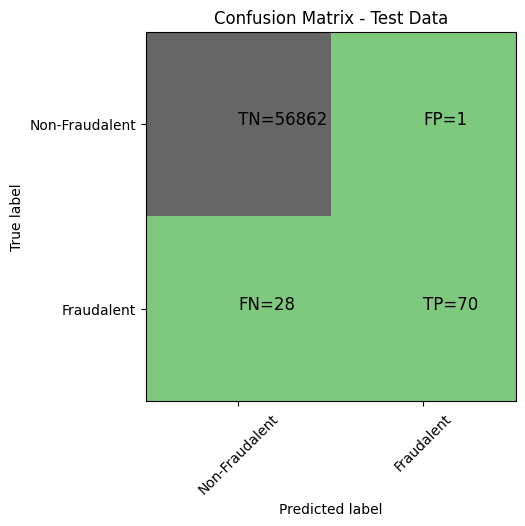

classificaation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9510490125389094
Random forest threshold: 0.01
ROC for the test datatest 0.9510490125389094


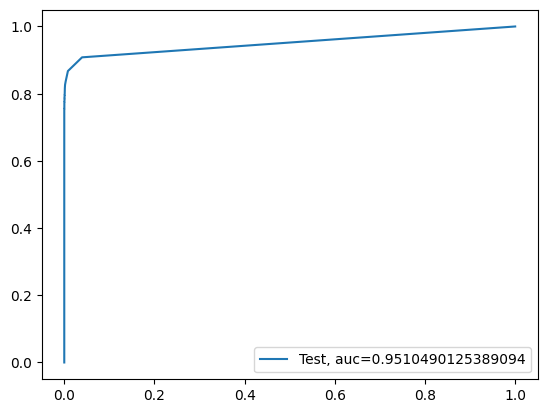

Time Taken by Model: ----158.65739011764526 Seconds------
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


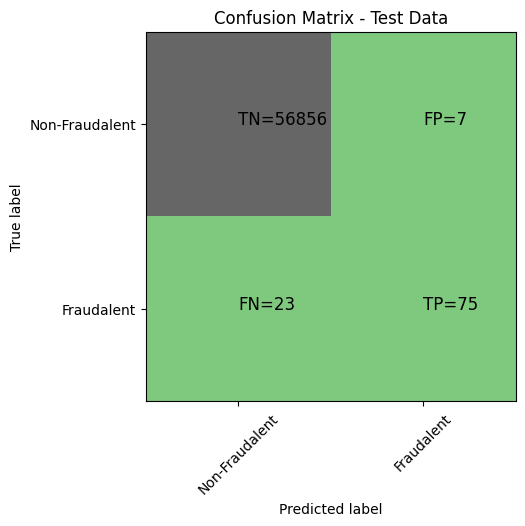

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9785452826647075
XGBoost threshold: 0.00013696240785066038
ROC for the test dataset 0.9785452826647075


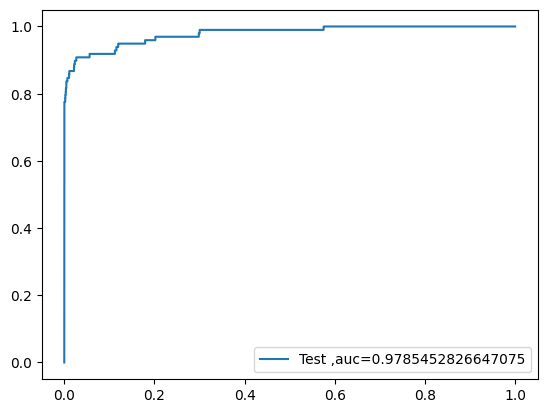

Time Taken by Model: ----3.0932297706604004 Seconds------
------------------------------------------------------------


In [45]:
Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold"
#Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_results = buildAndRunLogisticModels(df_results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_results = buildAndRunKNNModels(df_results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# #Run Decision Tree Models with 'gini and 'entropy' criteria
print("Decision Tree Model with 'gini' and 'entropy' criteria")
start_time = time.time()
df_results = buildAndRunTreeModels(df_results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# # #Run Random Forest Model
print("Random Forest")
start_time = time.time()
df_results = buildAndRunRandomForestModel(df_results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)

# # #Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_results = buildAndRunXGBoostModel(df_results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
print('-'*60)


# # #Run SVM Model
# print("SVM Model")
# start_time = time.time()
# df_results = buildAndRunSVMModels(df_results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
# print("Time Taken by Model: ----%s Seconds------"%(time.time() - start_time))
# print('-'*60)


In [46]:
from sklearn import linear_model
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
  Cs = num_C,
  penalty='l2',
  scoring='roc_auc',
  cv=cv_num,
  random_state=42,
  max_iter=10000,
  fit_intercept=True,
  solver='newton-cg',
  tol=10

)
    
linearl2 = searchCV_l2.fit(X_train_SKF_cv, y_train_SKF_cv)

y_pred_l2 = searchCV_l2.predict(X_test)

In [50]:
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)
y_pred = XGBmodel.predict(X_test)

In [47]:
test_pred_l2 = searchCV_l2.predict([[1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
test_pred_l2

array([0])

In [48]:
import joblib

joblib.dump(searchCV_l2, "l2logistic_cc_predict.pkl")

['l2logistic_cc_predict.pkl']

In [51]:
import joblib

joblib.dump(XGBmodel, "XGB_cc_predict.pkl")

['XGB_cc_predict.pkl']